In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

items = pd.read_csv("./data/items.csv")
shops = pd.read_csv("./data/shops.csv")
train = pd.read_csv("./data/sales_train.csv")
test = pd.read_csv("./data/test.csv")
cat = pd.read_csv("./data/item_categories.csv")

# EDA

## 데이터 타입 정보

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


date 가 문자열이다...  

In [25]:
# date 를 datetime 형으로 변환 
train["date"] = pd.to_datetime(train["date"], format="%d.%m.%Y") 
train["date"]

0         2013-01-02
1         2013-01-03
2         2013-01-05
3         2013-01-06
4         2013-01-15
             ...    
2935844   2015-10-10
2935845   2015-10-09
2935846   2015-10-14
2935847   2015-10-22
2935848   2015-10-03
Name: date, Length: 2935849, dtype: datetime64[ns]

In [26]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [27]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [29]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


## train 데이터 프레임의 boxplot

### item_price

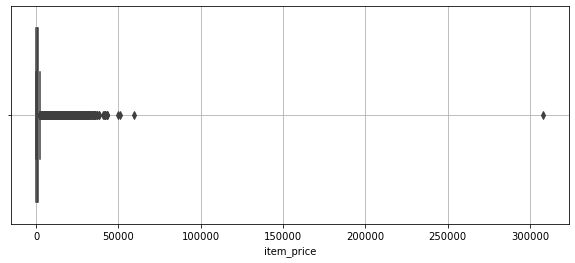

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_price)
plt.grid()

In [31]:
len(train[train["item_price"] >= 50000])

3

item_price값이 50000 이상인 행은 3개 이므로 제거 ..

In [35]:
train.drop(train[train["item_price"] >= 50000].index, axis = 0 , inplace=True)

## item_cnt_day

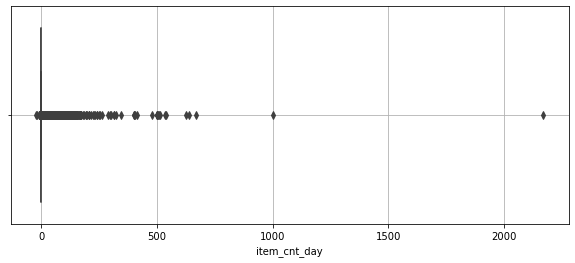

In [13]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_cnt_day)
plt.grid()

In [14]:
len(train[train["item_cnt_day"] >= 1000])

2

item_cnt_day값이 1000 이상인 행은 2개 이므로 제거 ..

In [36]:
train.drop(train[train["item_cnt_day"] >= 1000].index, axis = 0 , inplace=True)

# shops

In [16]:
# 특수문자가 많이 들어가 있다. 
shops.head(20)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [42]:
# 특수문자 제거  및 중복된 가게의 코드 확인 
import re


def clean_text(inputString):
    text_rmv = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', inputString)
    return text_rmv
shops_names = shops["shop_name"].apply(clean_text)
shops_id = shops["shop_id"]
# 중복되는 이름 확인 

for i in list(zip(shops_names ,shops_id)):
    for j in list(zip(shops_names ,shops_id)):
        if (re.match('.*'+i[0]+'*.',j[0])) and (i[1]!= j[1]):
            print('code : ', i[1], ' and  ', j[1])
            


code :  10  and   11
code :  11  and   10
code :  39  and   40
code :  57  and   0
code :  58  and   1


In [44]:
#  중복된 코드 바꾸기 
train["shop_id"] = train["shop_id"].replace({0: 57, 1: 58, 11: 10, 40: 39})

#  item

# item_category

# Feature engineering

## 하루 총 매출 (income_per_days) 추가

In [81]:
# y = train['shop_id']
# x = train['item_price']
# plt.figure(figsize=(10,10))
# sns.barplot(x= x , y=y)
# plt.show()

pivot_for_check_dicount = train.pivot_table(index = ['item_id', 'date_seq'] , values = 'item_price')

for i  in range(len(pivot_for_check_dicount) -1):
    if  pivot_for_check_dicount.loc[i,:]['item_price'].nunique() >1:
        print( i+1 ,'번째 다른 값 있음')


4 번째 다른 값 있음
28 번째 다른 값 있음
29 번째 다른 값 있음
30 번째 다른 값 있음
31 번째 다른 값 있음
32 번째 다른 값 있음
33 번째 다른 값 있음
34 번째 다른 값 있음
35 번째 다른 값 있음
36 번째 다른 값 있음
37 번째 다른 값 있음
38 번째 다른 값 있음
39 번째 다른 값 있음
40 번째 다른 값 있음
41 번째 다른 값 있음
42 번째 다른 값 있음
43 번째 다른 값 있음
44 번째 다른 값 있음
45 번째 다른 값 있음
46 번째 다른 값 있음
47 번째 다른 값 있음
48 번째 다른 값 있음
49 번째 다른 값 있음
50 번째 다른 값 있음
52 번째 다른 값 있음
53 번째 다른 값 있음
54 번째 다른 값 있음
55 번째 다른 값 있음
56 번째 다른 값 있음
57 번째 다른 값 있음
58 번째 다른 값 있음
60 번째 다른 값 있음
61 번째 다른 값 있음
62 번째 다른 값 있음
63 번째 다른 값 있음
64 번째 다른 값 있음
65 번째 다른 값 있음
66 번째 다른 값 있음
67 번째 다른 값 있음
68 번째 다른 값 있음
70 번째 다른 값 있음
71 번째 다른 값 있음
72 번째 다른 값 있음
73 번째 다른 값 있음
74 번째 다른 값 있음
75 번째 다른 값 있음
76 번째 다른 값 있음
77 번째 다른 값 있음
78 번째 다른 값 있음
79 번째 다른 값 있음
80 번째 다른 값 있음
81 번째 다른 값 있음
82 번째 다른 값 있음
83 번째 다른 값 있음


KeyError: 83

In [69]:
pivot_for_check_dicount
# 가게별 판매가격이 다른 것이 있음 
# train['income_per_days'] = train['item_cnt_day'] * train['item_price']
# train['income_per_days'] = train['income_per_days']


item_price
item_id date_seq            
0       608             58.0
1       456           4490.0
        458           4490.0
        551           4490.0
        580           4490.0
...                      ...
22168   32             799.0
        47             799.0
        66             798.5
        255            799.0
22169   444           4349.0

[1541610 rows x 1 columns]

## 날짜별 정렬을 위한 date_seq 추가

In [48]:
from sklearn.preprocessing import LabelEncoder
train.sort_values('date',inplace=True)
le = LabelEncoder()
train['date_seq'] = le.fit_transform(train['date'])



# 변수별 상관관계

In [53]:
# train_pivot_date_block_num = train.pivot_table(index = 'date_block_num' , values =  ,agg)
# plt.figure(figsize=(10,10))
# sns.pairplot(train_sample)